<a href="https://colab.research.google.com/github/AmpsandBits/FMML2023_LabsProjects/blob/main/FMML%20lab%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!  pip install wikipedia

import  wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=1355d2876c73703441645d8d5ce47665eddcd1d6b19190f35404d68d7b757f13
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [ ]:
topic1 = 'Paris'
topic2 = 'Octopus'

wikipedia.set_lang('en')

eng1 =wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('es')

es1 = wikipedia.page(topic1).content
es2 = wikipedia.page(topic2).content

In [ ]:
es2
eng1



'parisenglishfrenchpronunciationpaiisthecapitalandmostpopulouscityoffrancewithanofficialestimatedpopulationofresidentsasofjanuaryinanareaofmorethankmsqmimakingitthefourthmostpopulatedcityintheeuropeanunionaswellasthethmostdenselypopulatedcityintheworldinsincethethcenturyparishasbeenoneoftheworldsmajorcentresoffinancediplomacycommerceculturefashiongastronomyandmanyareasforitsleadingroleintheartsandsciencesaswellasitsearlyandextensivesystemofstreetlightinginthethcenturyitbecameknownasthecityoflightthecityofparisisthecentreoftheledefranceregionorparisregionwithanofficialestimatedpopulationofinhabitantsonjanuaryoraboutofthepopulationoffrancemakingtheregionfrancesprimatecitytheparisregionhadagdpofbillioninthehighestintheeuropeanunionaccordingtotheeconomistintelligenceunitworldwidecostoflivingsurveyinpariswasthecitywiththeninthhighestcostoflivingintheworldparisisamajorrailwayhighwayandairtransporthubservedbytwointernationalairportscharlesdegaulleairportthesecondbusiestairportineuropeandorlya

In [ ]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [ ]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
es1 = cleanup(es1)
es2 = cleanup(es2)

In [ ]:
print(es1)

lasjirafadesudfricagiraffacamelopardalisgiraffaesunasubespeciedegiraffacamelopardaliscuyareaseextiendealsurdelcontinenteafricanosudfricanamibiabotsuanazimbabueysurdemozambiqueconbaseenestudiosgenticosalgunoslaconsideranunaespeciediferentesediferenciadelasotrassubespeciesconlasquesecruzafcilmenteporlasmanchasredondasoenformadeestrellapresentesentodoelpiehastalaspezuasreferenciasenlacesexternoswikispeciestieneunartculosobregiraffagiraffagiraffawikimediacommonsalbergaunacategoramultimediasobregiraffagiraffagiraffa


In [ ]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

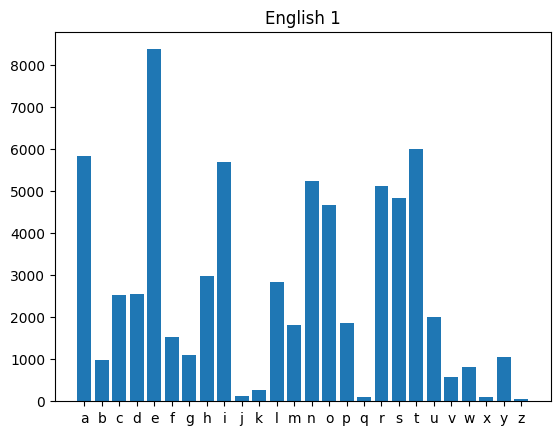

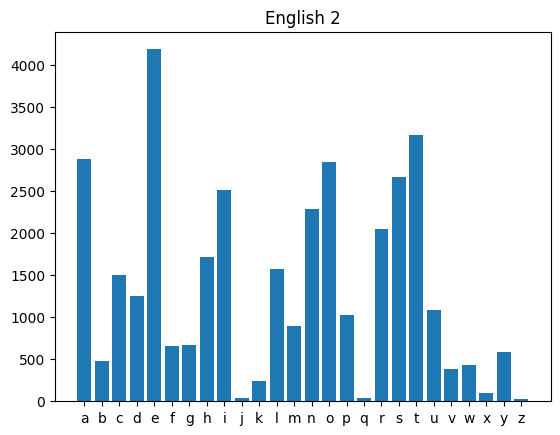

In [ ]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

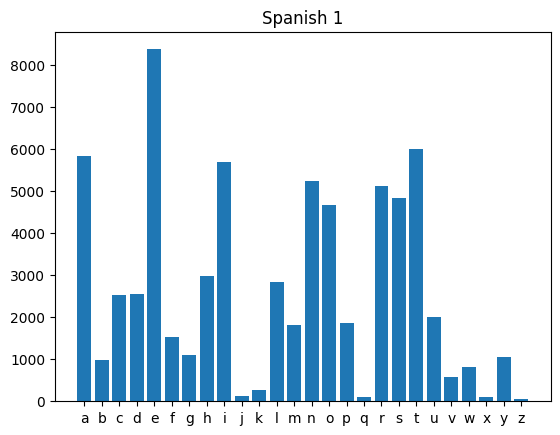

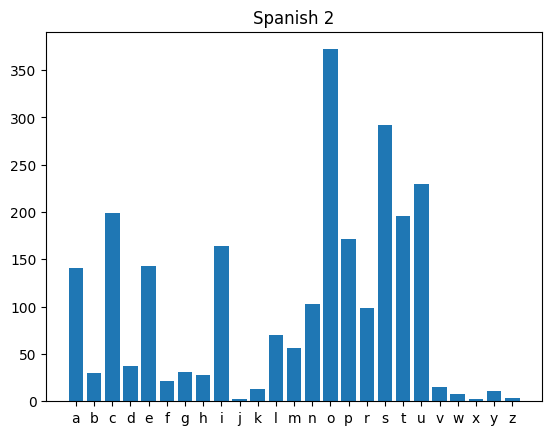

In [ ]:
unigram_fr1 = Counter(ngrams(es1,1))
plothistogram(unigram_eng1)
plt.title('Spanish 1')
plt.show()
unigram_fr2 = Counter(ngrams(es2,1))
plothistogram(unigram_fr2)
plt.title('Spanish 2')
plt.show()

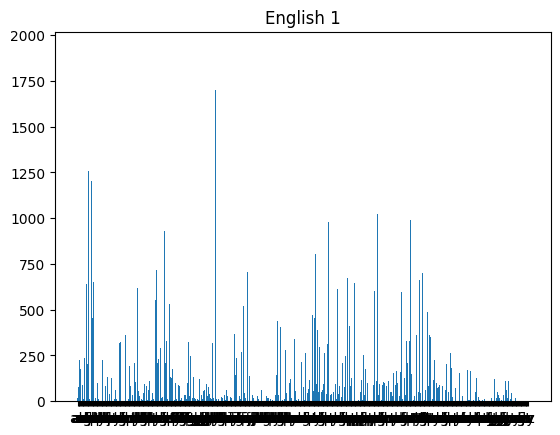

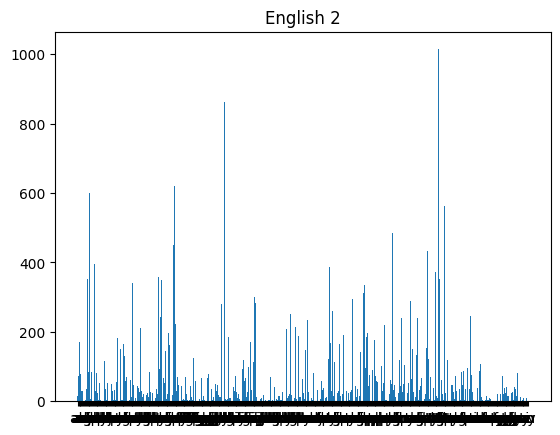

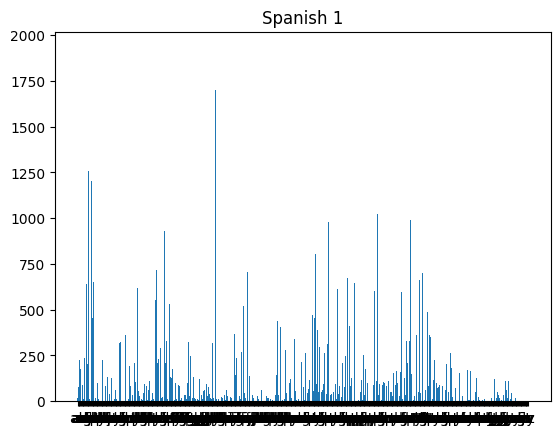

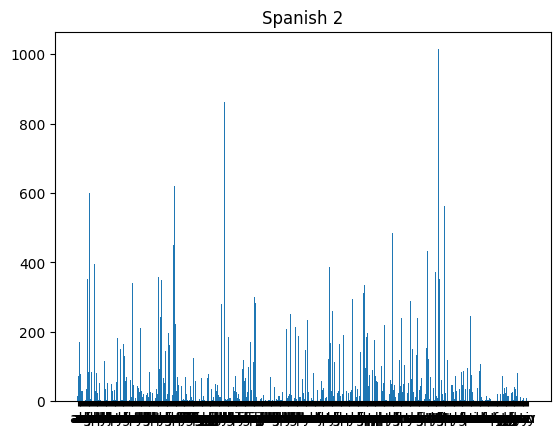

In [ ]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(es1,2))
plothistogram(bigram_eng1)
plt.title('Spanish 1')
plt.show()

bigram_fr2 = Counter(ngrams(es2,2))
plothistogram(bigram_eng2)
plt.title('Spanish 2')
plt.show()

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

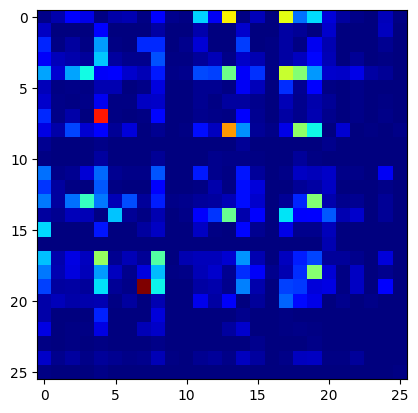

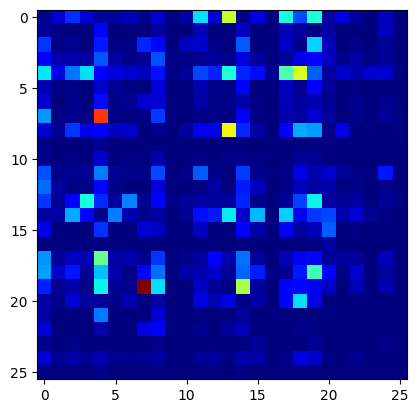

In [ ]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

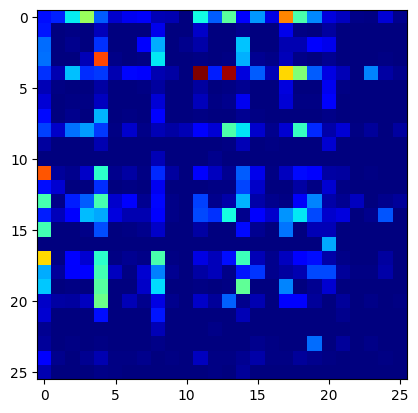

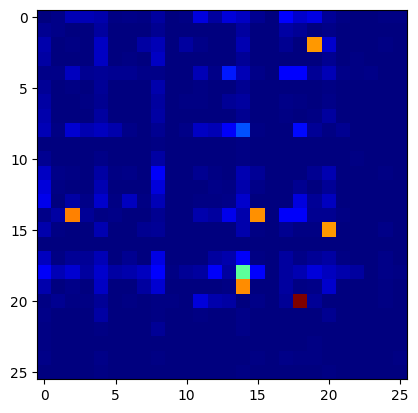

In [ ]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [ ]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nSpanish 1:')
ShowTopN(bifr1)
print('\nSpanish 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 1922.0
('h', 'e') : 1699.0
('i', 'n') : 1435.0
('a', 'n') : 1259.0
('a', 'r') : 1202.0
('e', 'r') : 1135.0
('r', 'e') : 1022.0
('i', 's') : 1007.0
('s', 't') : 989.0
('e', 's') : 982.0

English 2:
('t', 'h') : 1014.0
('h', 'e') : 862.0
('i', 'n') : 655.0
('e', 's') : 621.0
('a', 'n') : 599.0
('t', 'o') : 563.0
('r', 'e') : 484.0
('e', 'r') : 450.0
('s', 't') : 433.0
('a', 't') : 396.0

Spanish 1:
('e', 'l') : 207.0
('e', 'n') : 201.0
('d', 'e') : 173.0
('l', 'a') : 169.0
('a', 'r') : 159.0
('e', 'r') : 141.0
('r', 'a') : 140.0
('a', 'd') : 111.0
('e', 's') : 105.0
('u', 'e') : 100.0

Spanish 2:
('u', 's') : 179.0
('o', 'c') : 138.0
('t', 'o') : 136.0
('o', 'p') : 135.0
('c', 't') : 134.0
('p', 'u') : 134.0
('s', 'o') : 83.0
('i', 'o') : 37.0
('e', 'n') : 27.0
('i', 's') : 24.0


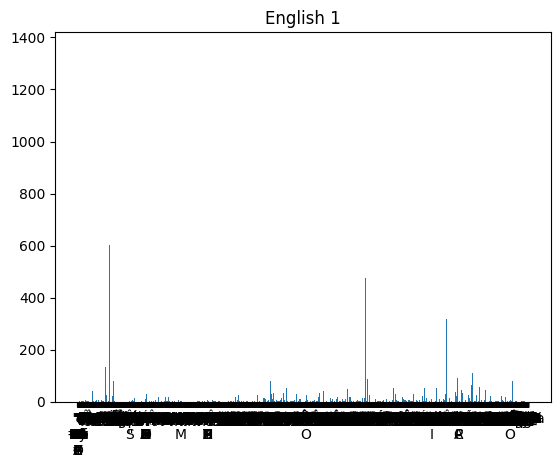

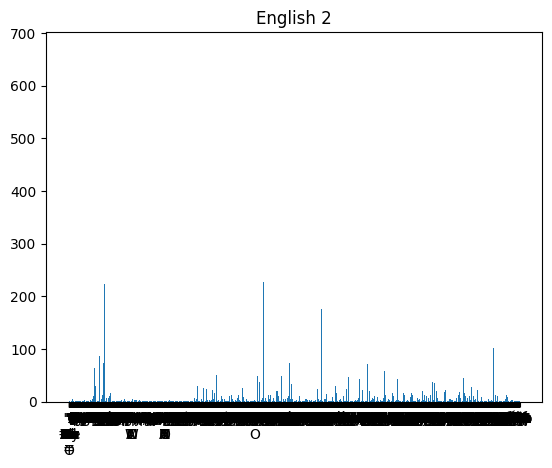

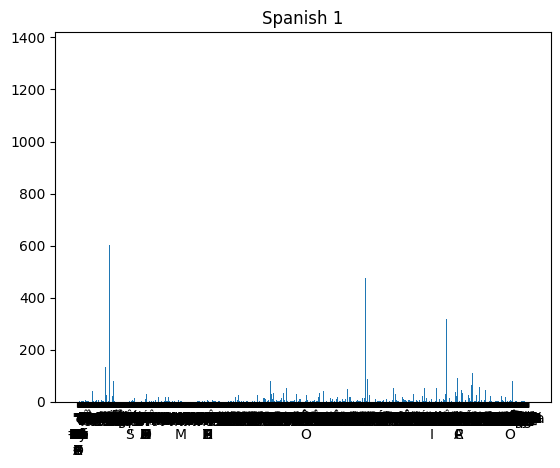

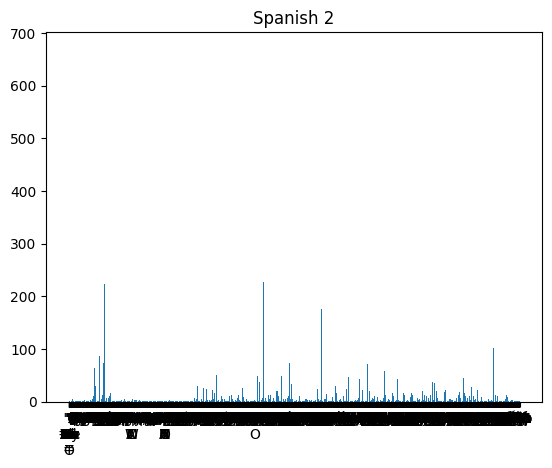

In [ ]:
trigram_eng1 = Counter(ngrams(eng1,3)) # trigrams
plothistogram(trigram_eng1)
plt.title('English 1')
plt.show()

trigram_eng2 = Counter(ngrams(eng2,3))
plothistogram(trigram_eng2)
plt.title('English 2')
plt.show()

trigram_fr1 = Counter(ngrams(es1,3))
plothistogram(trigram_eng1)
plt.title('Spanish 1')
plt.show()

bigram_fr2 = Counter(ngrams(es2,3))
plothistogram(trigram_eng2)
plt.title('Spanish 2')
plt.show()

In [ ]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
no2 = train_X[train_y==2,:,:]
no5 = train_X[train_y==5,:,:]
no9 = train_X[train_y==9,:,:]

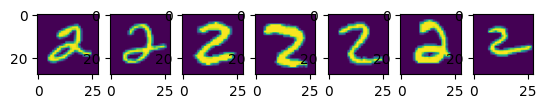

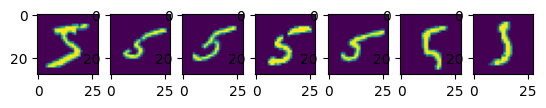

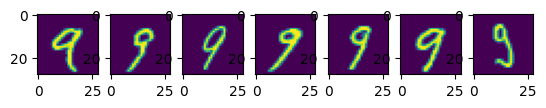

In [ ]:
for ii in range(7):
  plt.subplot(1, 7, ii+1)
  plt.imshow(no2[ii,:,:])
plt.show()
for ii in range(7):
  plt.subplot(1, 7, ii+1)
  plt.imshow(no5[ii,:,:])
plt.show()
for ii in range(7):
  plt.subplot(1, 7, ii+1)
  plt.imshow(no9[ii,:,:])
plt.show()

In [ ]:
sum2 = np.sum(no2>0, (1,2)) # threshold before adding up
sum5 = np.sum(no5>0, (1,2))
sum9 = np.sum(no9>0,(1,2))

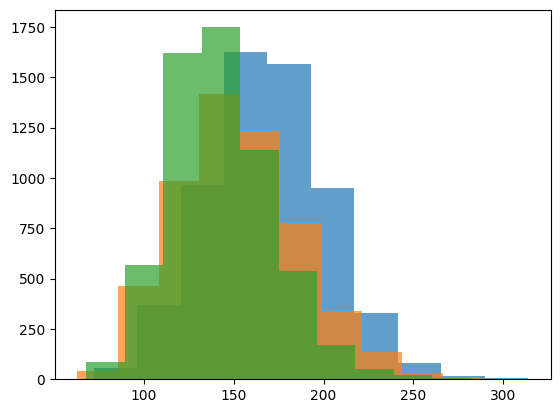

In [ ]:
plt.hist(sum2, alpha=0.7);
plt.hist(sum5, alpha=0.7);
plt.hist(sum9, alpha=0.7);

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

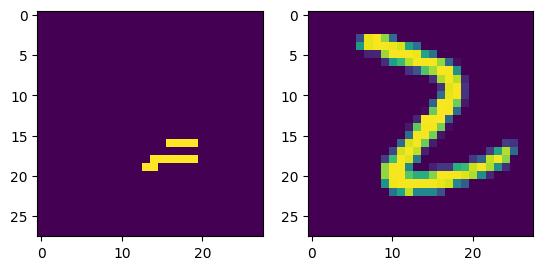

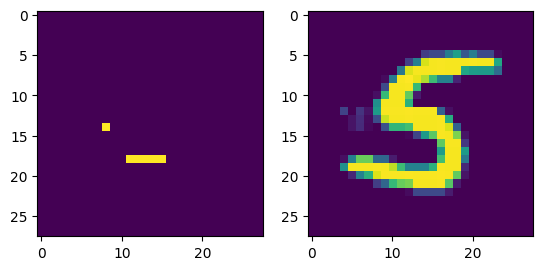

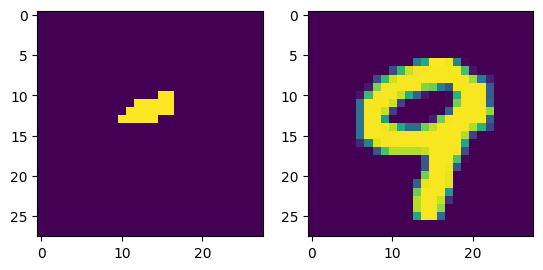

In [ ]:
imgs = [no2[456,:,:],  no5[456,:,:], no9[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

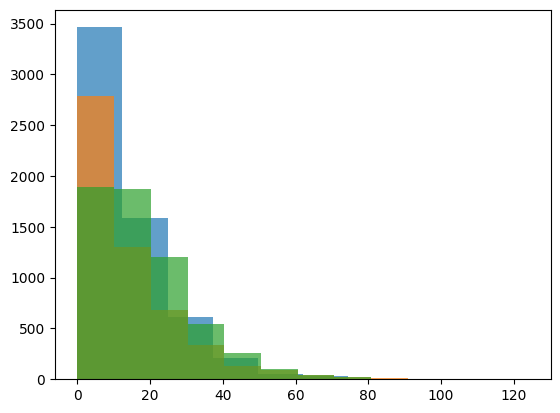

In [ ]:
hole2 = np.array([getHolePixels(i).sum() for i in no2])
hole5 = np.array([getHolePixels(i).sum() for i in no5])
hole9 = np.array([getHolePixels(i).sum() for i in no9])
plt.hist(hole2, alpha=0.7);
plt.hist(hole5, alpha=0.7);
plt.hist(hole9, alpha=0.7);

In [ ]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

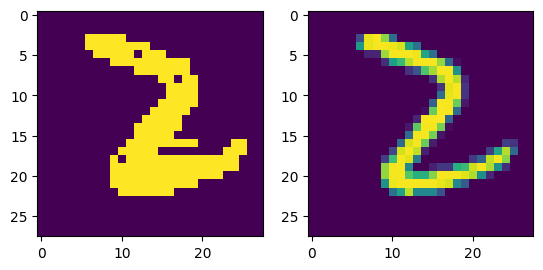

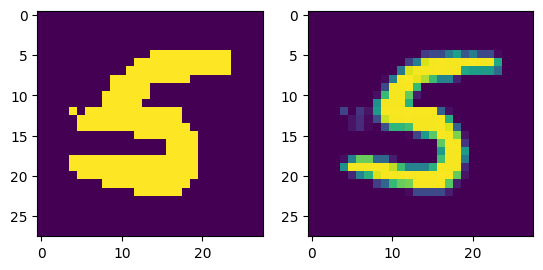

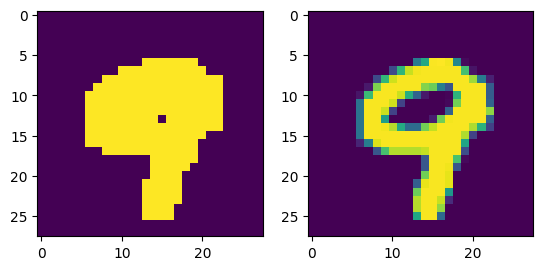

In [ ]:
imgs = [no2[456,:,:],  no5[456,:,:], no9[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

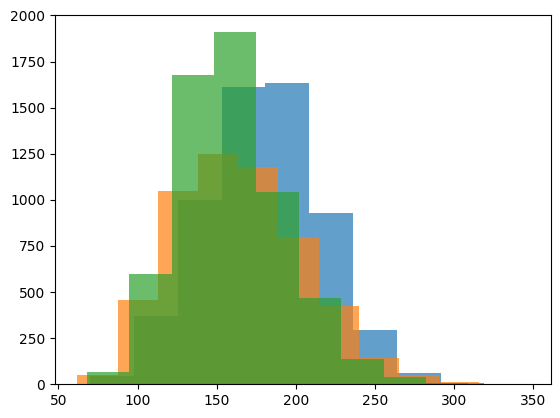

In [ ]:
hull1 = np.array([getHullPixels(i).sum() for i in no2])
hull0 = np.array([getHullPixels(i).sum() for i in no5])
hull2 = np.array([getHullPixels(i).sum() for i in no9 ])
plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);
plt.hist(hull2, alpha =0.7);

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

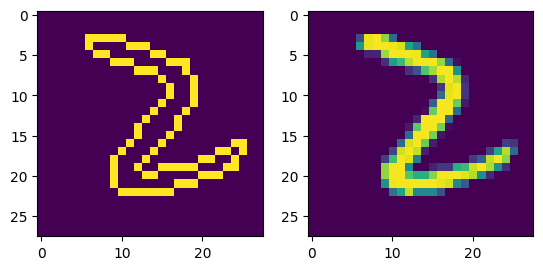

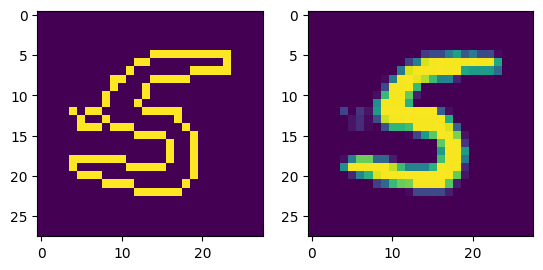

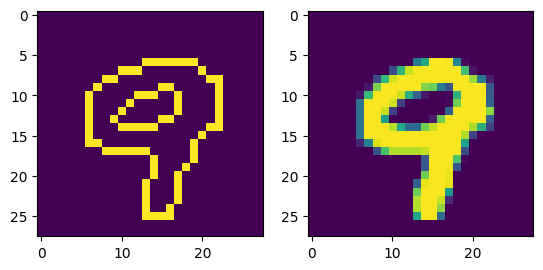

In [ ]:
imgs = [no2[456,:,:],  no5[456,:,:], no9[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

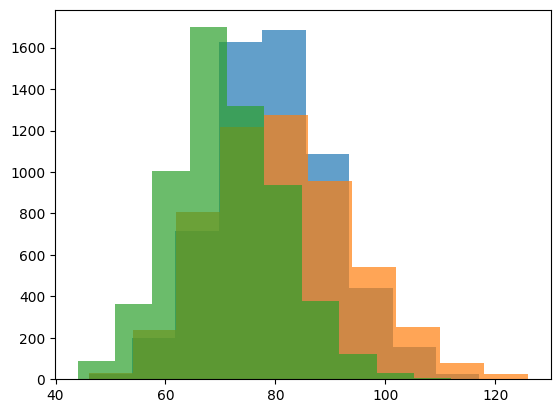

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no2])
bound0 = np.array([getBoundaryPixels(i).sum() for i in no5])
bound2= np.array([getBoundaryPixels(i).sum() for i in no9])
plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);
plt.hist(bound2, alpha=0.7);

In [ ]:
cl1 = ['class 2']*len(sum2)
cl0 = ['class 5']*len(sum5)
cl2 = ['class 9']* len(sum9)
df = pd.DataFrame(list(zip(np.concatenate((hole2, hole5,hole9)), np.concatenate((sum2,sum5,sum9)),
                           np.concatenate((bound1,bound0,bound2)), np.concatenate((cl1, cl0,cl2)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()